<a href="https://colab.research.google.com/github/sarahmagdi/ITI_UnSupervised/blob/main/final_ML2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

1. Read the dataset¶


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML2/CC GENERAL.csv")
print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


2. Data investigation

in this part we need to check the data quality and assess any issues in the data as:
null values in each column|each column has the proper data type|outliers|
duplicate rows|distribution for each column (skewness)

In [ ]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
#displaying some sample of data
df.head(7)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12


In [ ]:
#proportion of null values in each column
round(df.isnull().sum(axis=0)*100/df.shape[0],3)

CUST_ID                             0.000
BALANCE                             0.000
BALANCE_FREQUENCY                   0.000
PURCHASES                           0.000
ONEOFF_PURCHASES                    0.000
INSTALLMENTS_PURCHASES              0.000
CASH_ADVANCE                        0.000
PURCHASES_FREQUENCY                 0.000
ONEOFF_PURCHASES_FREQUENCY          0.000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000
CASH_ADVANCE_FREQUENCY              0.000
CASH_ADVANCE_TRX                    0.000
PURCHASES_TRX                       0.000
CREDIT_LIMIT                        0.011
PAYMENTS                            0.000
MINIMUM_PAYMENTS                    3.497
PRC_FULL_PAYMENT                    0.000
TENURE                              0.000
dtype: float64

In [ ]:
#basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
#to solve object type column without missing any information
df=df.set_index('CUST_ID')

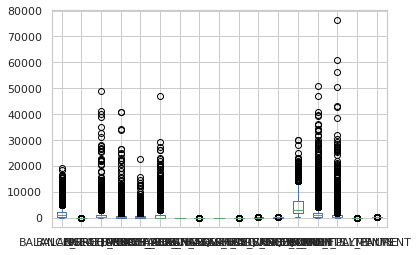

In [ ]:
# to explain the outliers in each column , i use box plot
df.plot.box(grid='True')

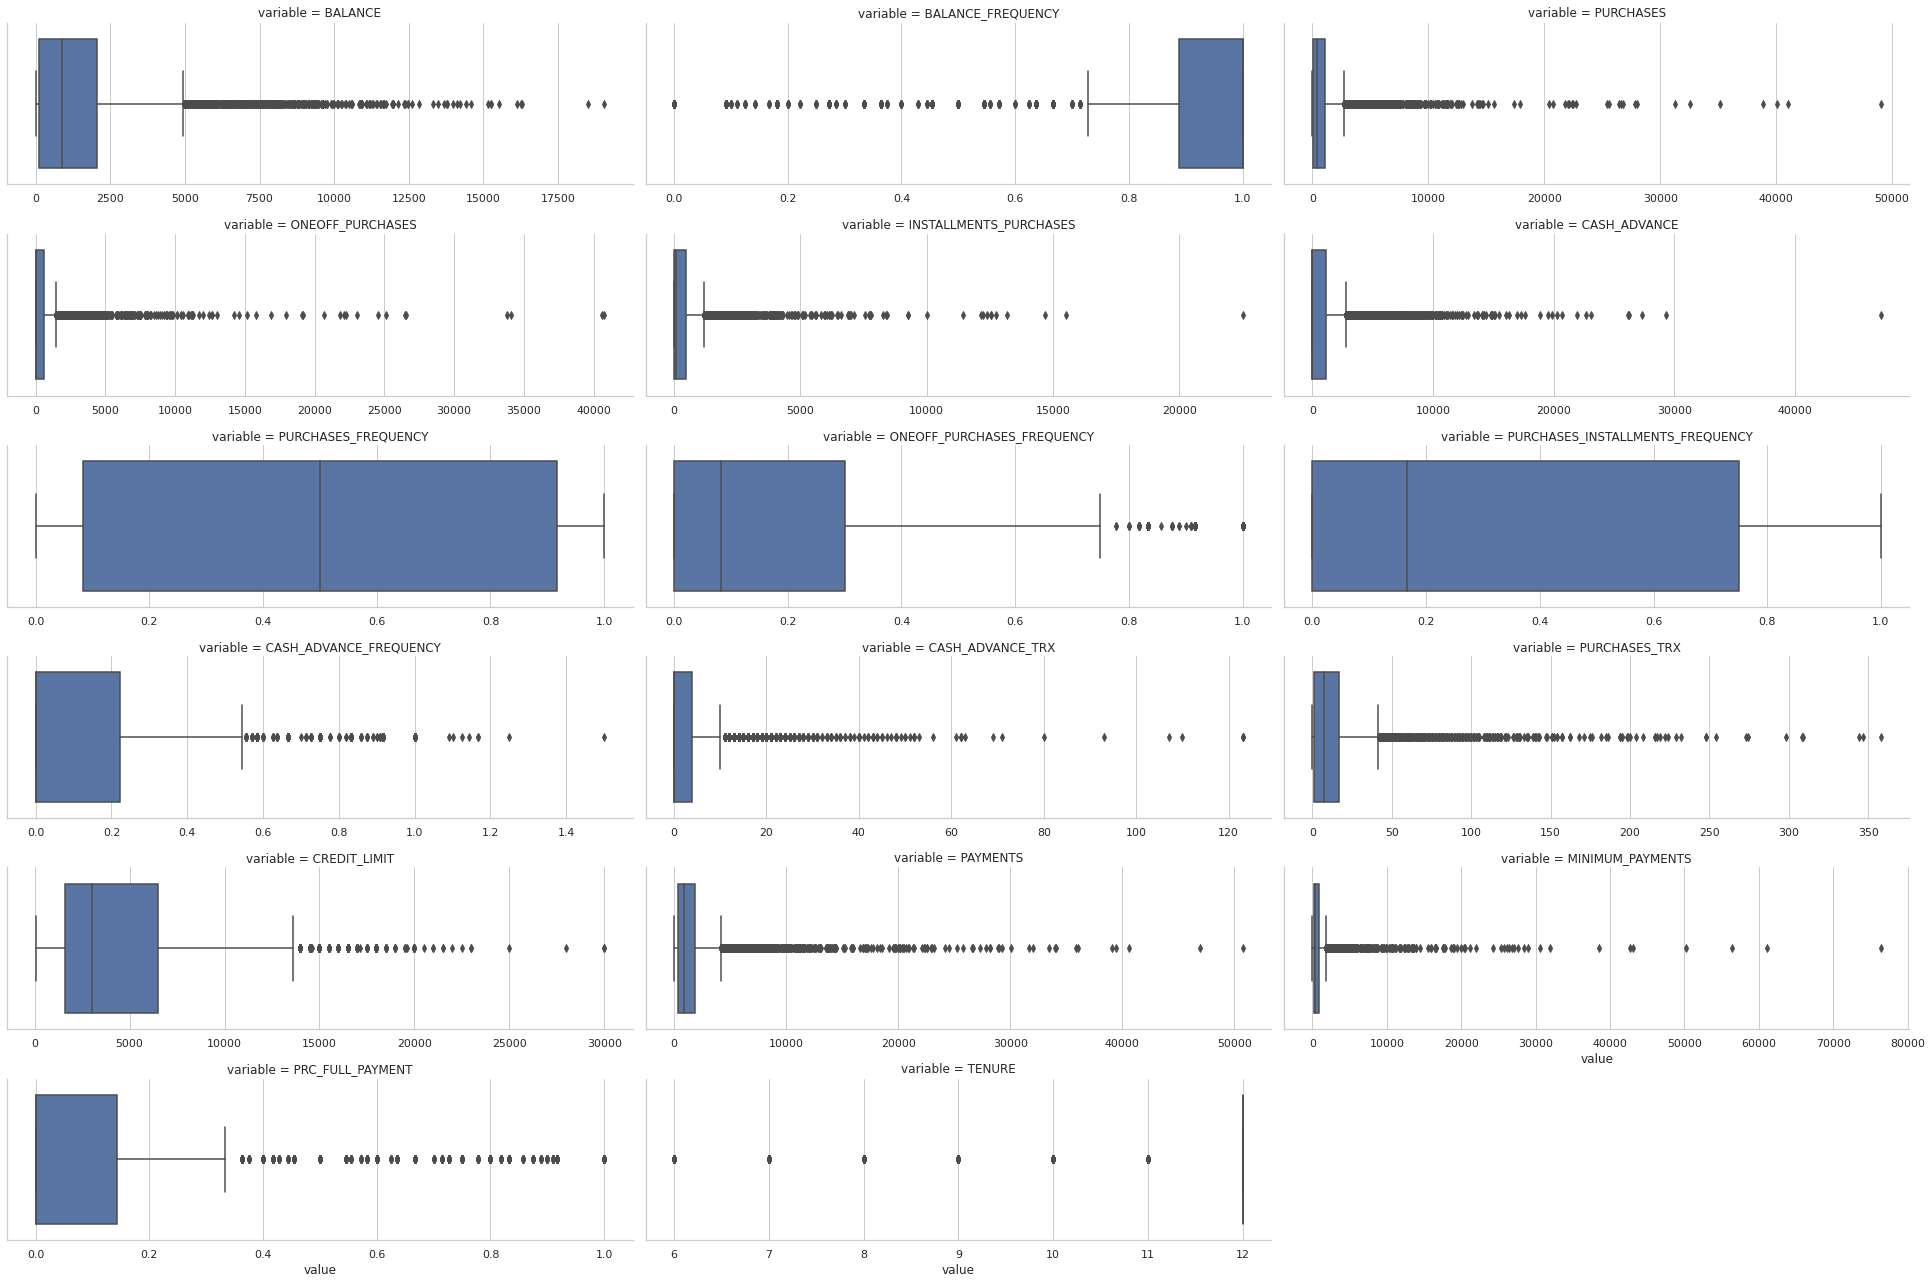

In [ ]:
 # outliers in each column 
import seaborn as sns
fig = pd.melt(df, value_vars=df.columns)
graph1 = sns.FacetGrid(fig, col="variable",  col_wrap=3, sharex=False, sharey=False, height=3, aspect=3)
graph2 = graph1.map(sns.boxplot, "value")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa461fa5450>,
      dtype=object)

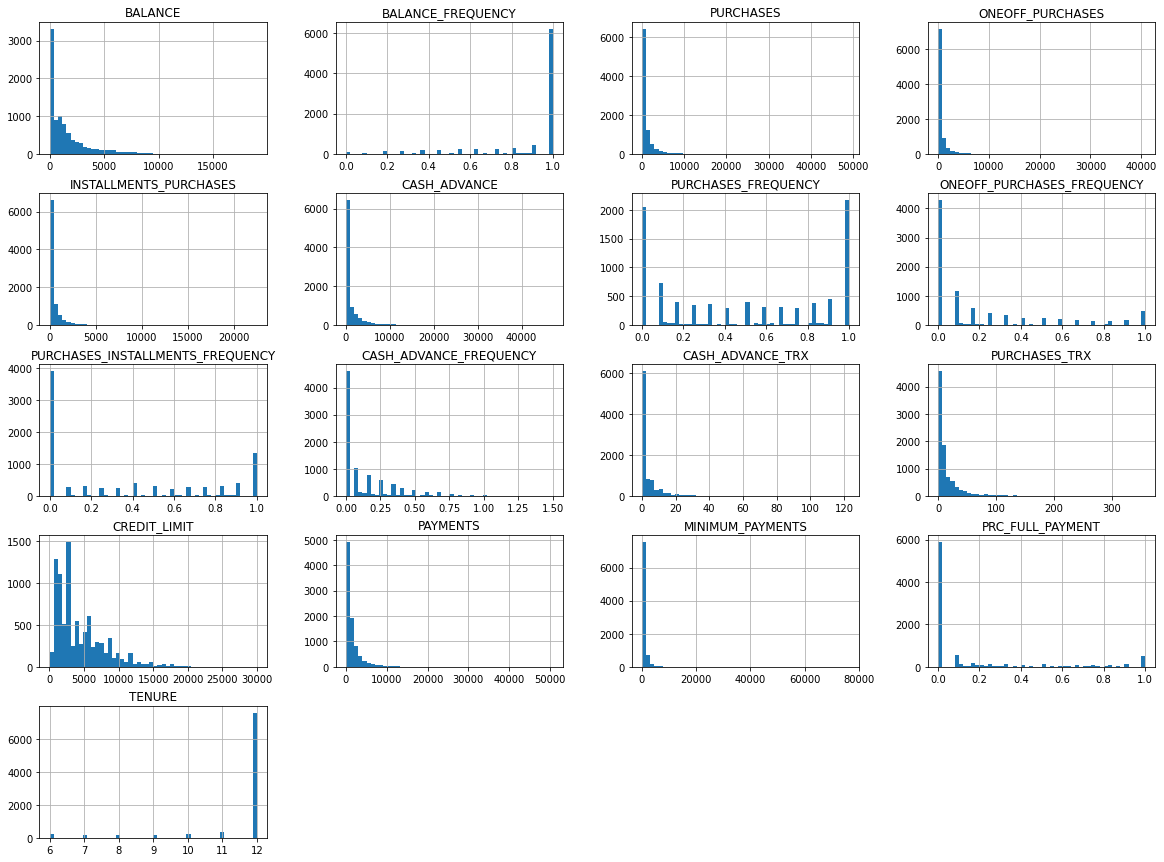

In [ ]:
#distribution of each column to see skew data
df.hist(bins=50,figsize=(20,15))

In [ ]:
df.agg(['skew', 'kurtosis']).transpose() 

,skew,kurtosis
BALANCE,2.393386,7.674751
BALANCE_FREQUENCY,-2.023266,3.092370
PURCHASES,8.144269,111.388771
ONEOFF_PURCHASES,10.045083,164.187572
INSTALLMENTS_PURCHASES,7.299120,96.575178
CASH_ADVANCE,5.166609,52.899434
PURCHASES_FREQUENCY,0.060164,-1.638631
ONEOFF_PURCHASES_FREQUENCY,1.535613,1.161846
PURCHASES_INSTALLMENTS_FREQUENCY,0.509201,-1.398632
CASH_ADVANCE_FREQUENCY,1.828686,3.334734


In [ ]:
#to see corr between each pair column
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

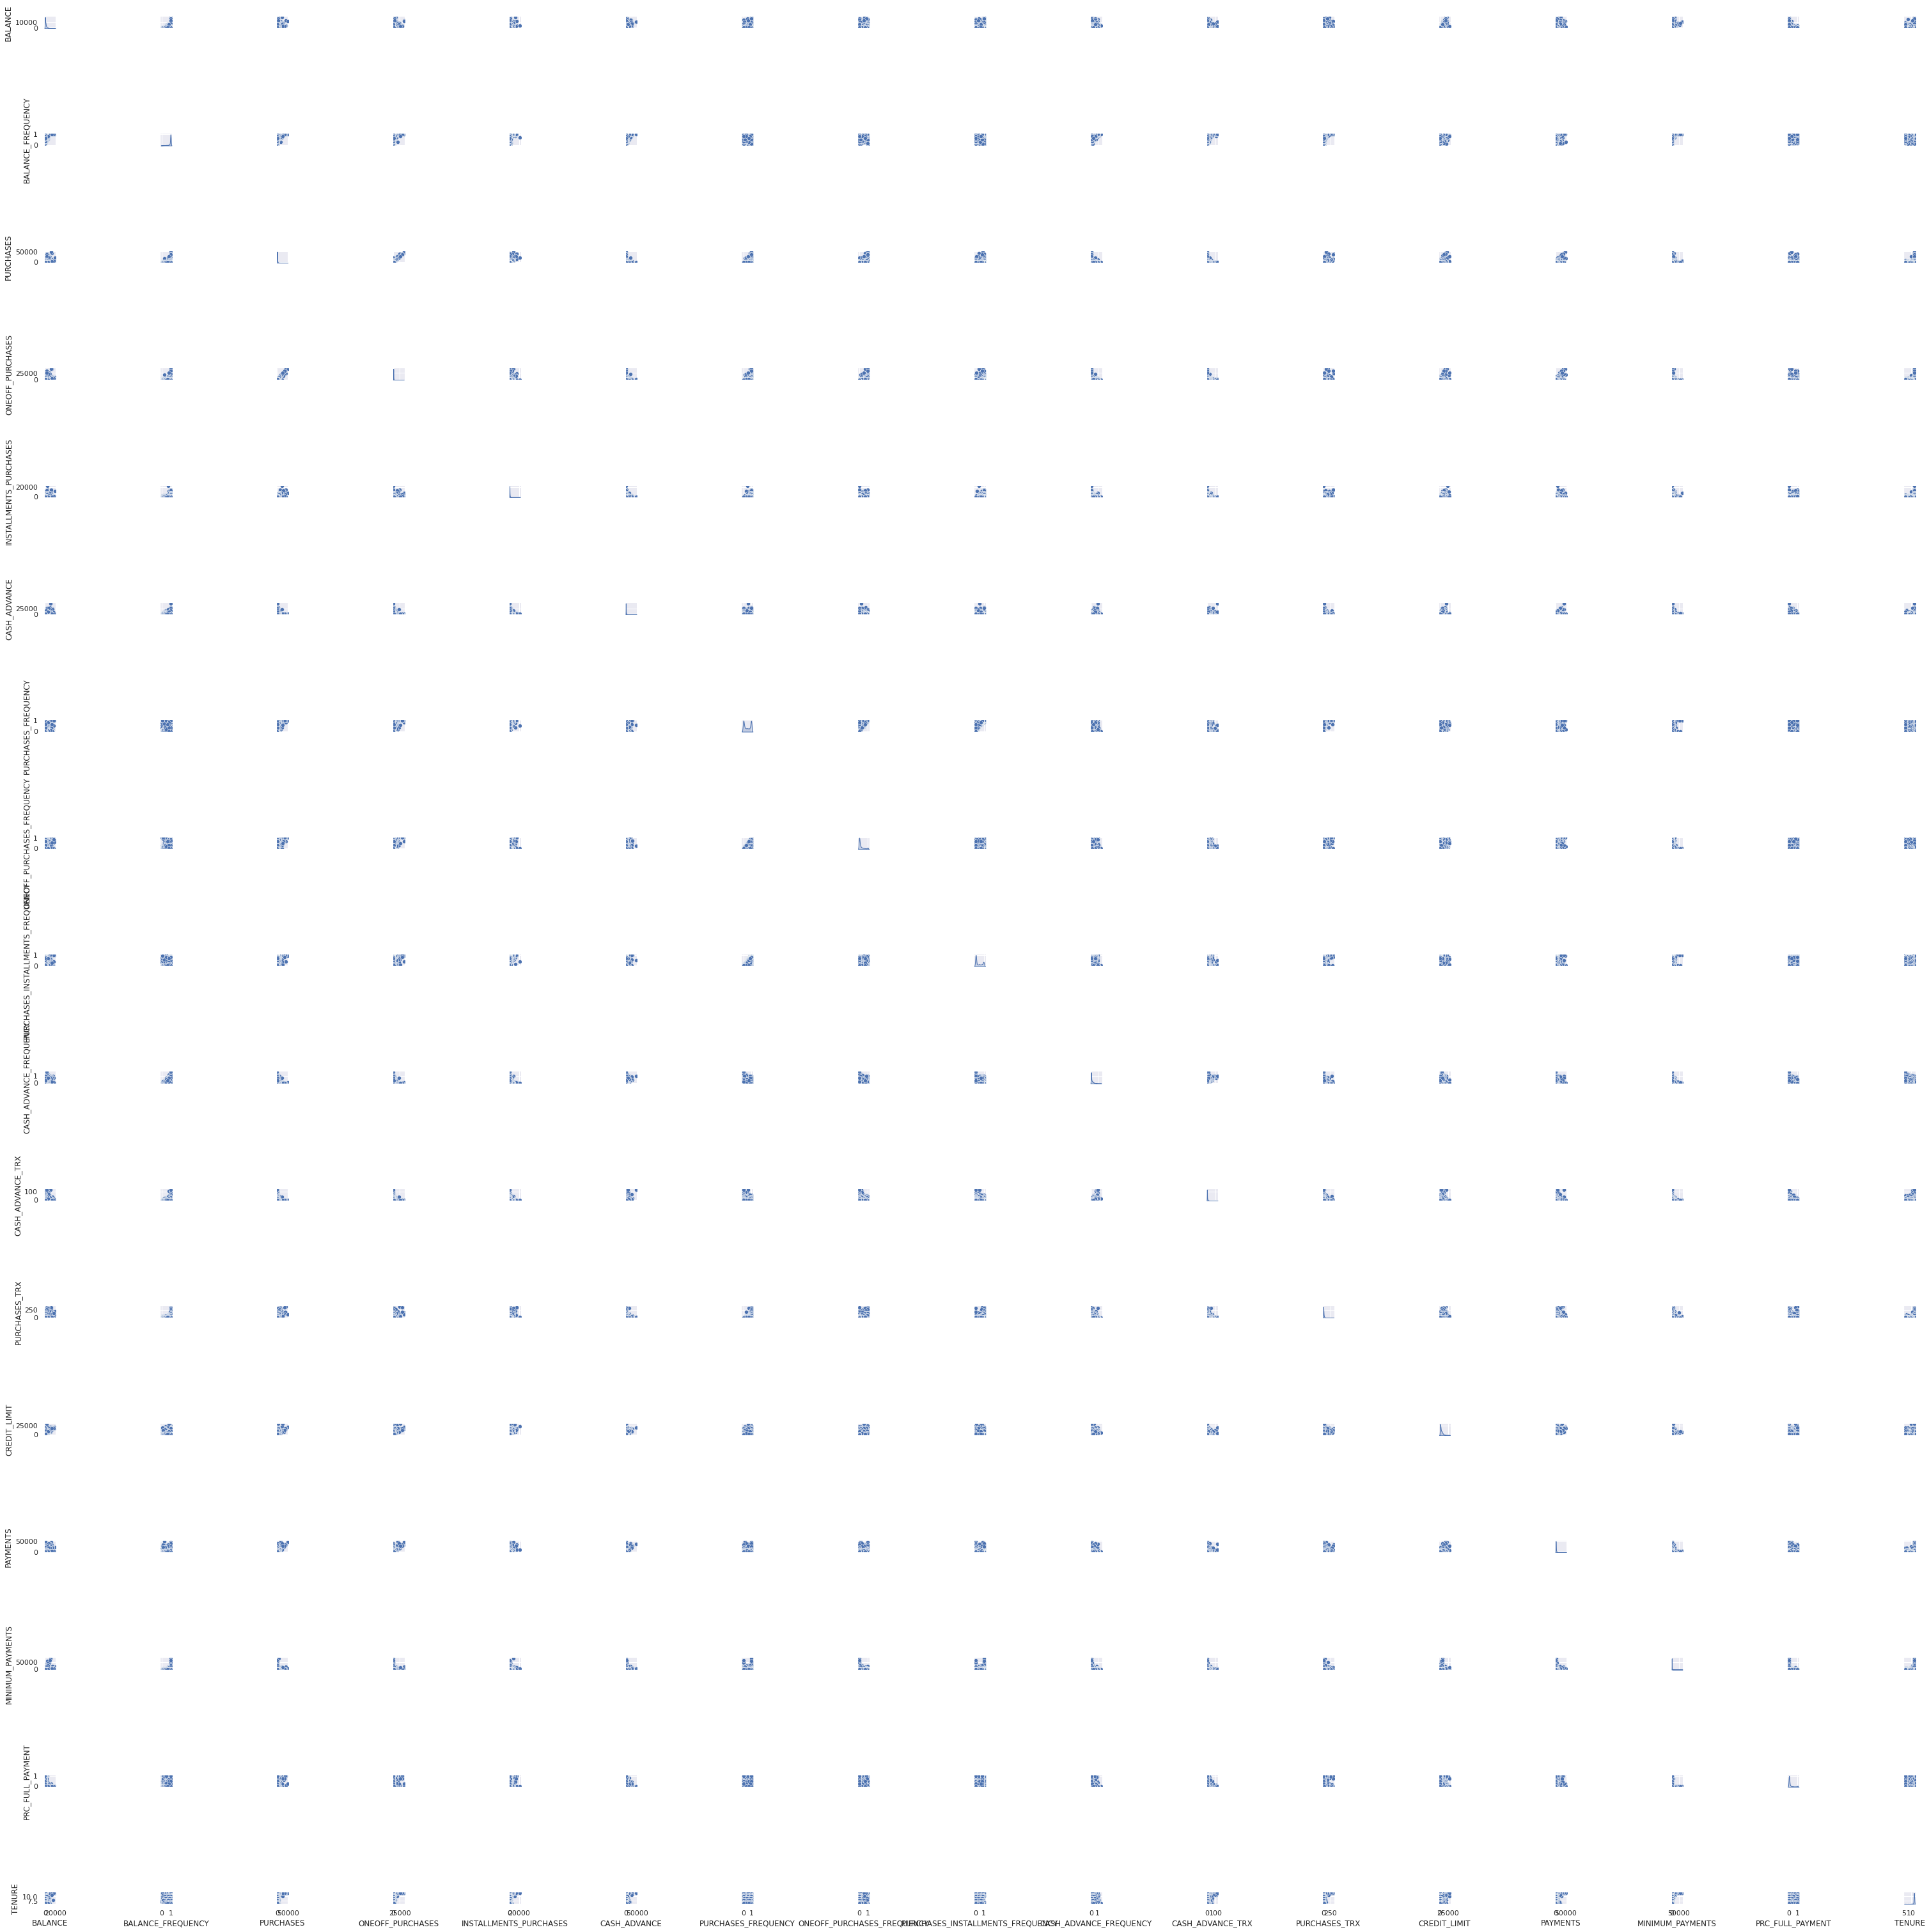

In [ ]:
sns.pairplot(df,diag_kind="kde")

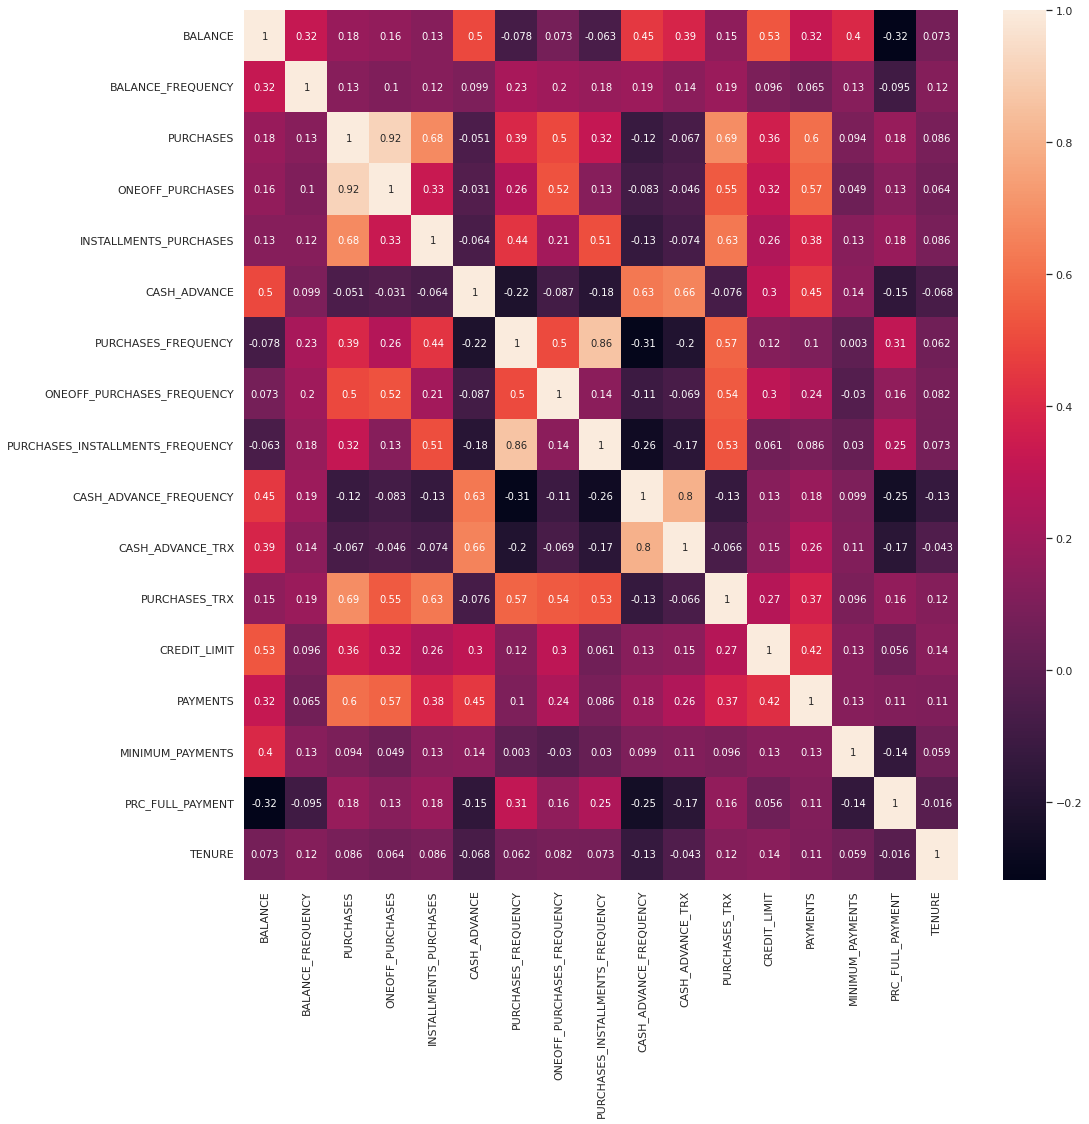

In [ ]:
#another way using heatmap
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True)
plt.show()

**3. Data preprocessing**

here we will solve the problems that we had found in the previous part

In [ ]:
#first we should make a copy for the original dataset before doing anything
df_copy=df.copy()

 missing values

In [ ]:
#two columns(MINIMUM_PAYMENTS,CREDIT_LIMIT) have null values(3.50,0.01) perecent
#solution 
#delete row that has null value in CREDIT_LIMIT
#fill null values in MINIMUM_PAYMENTS with median
df_copy= df_copy[df_copy.CREDIT_LIMIT.notnull()]
df_copy["MINIMUM_PAYMENTS"]=df_copy["MINIMUM_PAYMENTS"].fillna(df_copy["MINIMUM_PAYMENTS"].median())

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CRED

In [ ]:
#before i doing handles ,i should keep another copy for anamoly detection (to save outliers*********)

In [ ]:
df_copy_with_outliers=df_copy.copy()

skewness problem in data

In [ ]:
# high left Skewed Data(negative and positive and symetric )

In [ ]:
#i will use log  Transformation methodology  for Highly Positive Skew( most columns values in range (0,1)).

In [ ]:
df_copy[df_copy.columns.difference(['TENURE'])] = df_copy[df_copy.columns.difference(['TENURE'])].apply(lambda m: np.log1p(m))

In [ ]:
# Log transformation of negatively (left) skewed data for  (BALANCE_FREQUENCY) column

In [ ]:
df_copy.insert(len(df_copy.columns), 'BALANCE_FREQUENCY_log',
         np.log(max(df_copy.iloc[:, 2] + 1) - df_copy.iloc[:, 2]))
df_copy.drop("BALANCE_FREQUENCY", axis='columns', inplace=True)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   PURCHASES                         8949 non-null   float64
 2   ONEOFF_PURCHASES                  8949 non-null   float64
 3   INSTALLMENTS_PURCHASES            8949 non-null   float64
 4   CASH_ADVANCE                      8949 non-null   float64
 5   PURCHASES_FREQUENCY               8949 non-null   float64
 6   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 7   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 8   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 9   CASH_ADVANCE_TRX                  8949 non-null   float64
 10  PURCHASES_TRX                     8949 non-null   float64
 11  CREDIT_LIMIT                      8949 non-null   float64
 12  PAYM

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4297b9f50>,
      dtype=object)

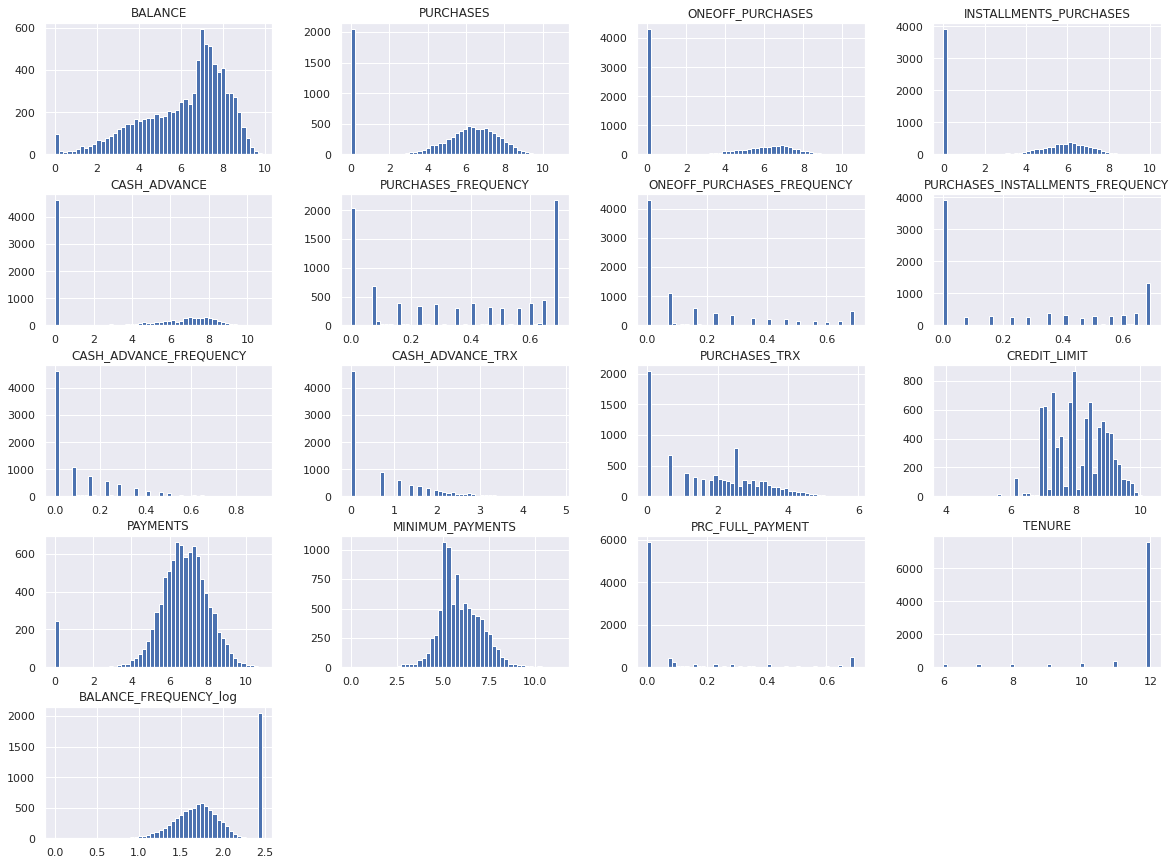

In [ ]:
#displaying distribution of each column after solving skewness problem
df_copy.hist(bins=50,figsize=(20,15))

 4-Features transformation

In [ ]:
from sklearn import preprocessing
transformer = preprocessing.Normalizer().fit(df_copy)
df_copy=transformer.transform(df_copy)
df_copy

array([[0.2137942 , 0.26148346, 0.        , ..., 0.        , 0.68683316,
        0.1132417 ],
       [0.36422246, 0.        , 0.        , ..., 0.00905461, 0.54146128,
        0.11136657],
       [0.36219852, 0.30799204, 0.30799204, ..., 0.        , 0.55562542,
        0.07587654],
       ...,
       [0.23168215, 0.36113577, 0.        , ..., 0.01618341, 0.43514803,
        0.1392469 ],
       [0.23036487, 0.        , 0.        , ..., 0.01924382, 0.51743787,
        0.21285098],
       [0.34504096, 0.40762155, 0.40762155, ..., 0.        , 0.34949852,
        0.09140278]])

In [ ]:
# another scaler 
from sklearn.preprocessing import StandardScaler
df_sc = StandardScaler().fit_transform(df_copy)

**5-Dimensionality Reduction **

using PCA to solve high corr between features and choose the best features

In [ ]:
from sklearn.decomposition import PCA, KernelPCA
pca=PCA(n_components=12)
pca.fit(df_copy)
PCA_df = pca.transform(df_copy)
print('shape of original data', df_copy.shape)
cumsum = pca.explained_variance_ratio_.cumsum()
print('cumliative explained variance for each component',cumsum)
print('shape of reduction data ', PCA_df.shape)



shape of original data (8949, 17)
cumliative explained variance for each component [0.51744222 0.71726635 0.84907774 0.90050062 0.93895132 0.96063128
 0.97779958 0.98652155 0.99167321 0.99523676 0.99775421 0.99878306]
shape of reduction data  (8949, 12)


using PCA Kernel to solve high corr between features and choose the best features

In [ ]:
from sklearn.decomposition import KernelPCA
Kpca_obj = KernelPCA(n_components=12)
Kpca_obj.fit(df_copy)
Kpca_df = Kpca_obj.transform(df_copy)
print('shape of original data', df_copy.shape)
#cumsum2 = Kpca_obj.explained_variance_ratio_.cumsum()
#print('cumliative explained variance for each component',cumsum2)
print('shape of reduction data ', Kpca_df.shape)

shape of original data (8949, 17)
shape of reduction data  (8949, 12)


**conclusion**

dataset not linearly separable so kernel pca is better

**6- displaying data in 2d using  T-sne**

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(learning_rate='auto',random_state=42).fit_transform(df_copy)
X_embedded.shape


(8949, 2)

In [ ]:
pca_X_embedded = TSNE(learning_rate='auto',random_state=42).fit_transform(PCA_df)
pca_X_embedded.shape


(8949, 2)

In [ ]:
kernal_pca_X_embedded = TSNE(learning_rate='auto',random_state=42).fit_transform(Kpca_df)
kernal_pca_X_embedded.shape

(8949, 2)

In [ ]:
X_embedded2 = pd.DataFrame(X_embedded, index=df_copy_with_outliers.index)
pca_X_embedded2 = pd.DataFrame(pca_X_embedded, index=df_copy_with_outliers.index)
kernal_pca_X_embedded2 = pd.DataFrame(kernal_pca_X_embedded, index=df_copy_with_outliers.index)

In [ ]:
X_embedded2.head(5)

,0,1
CUST_ID,,
C10001,-25.044514,38.637871
C10002,8.565531,-44.047306
C10003,-48.710407,-49.035355
C10004,35.075058,4.669329
C10005,-62.638359,-35.328346


[Text(0.5, 1.0, 'original dataset')]

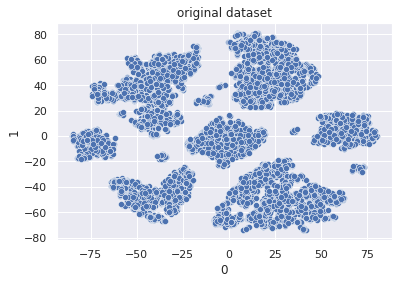

In [ ]:
#for original ds 
sns.scatterplot(data=X_embedded2, x=0, y=1).set(title='original dataset')

[Text(0.5, 1.0, 'PCA dataset')]

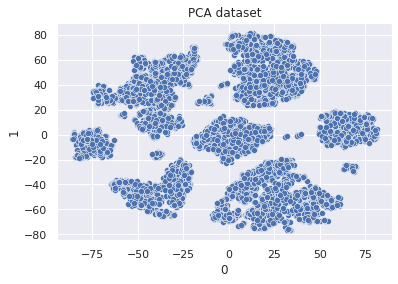

In [ ]:
#PCA dataset
sns.scatterplot(data=pca_X_embedded2, x=0, y=1).set(title='PCA dataset')

[Text(0.5, 1.0, 'kernal PCA dataset')]

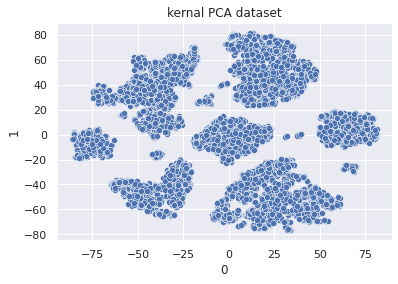

In [ ]:
#kernal PCA dataset
sns.scatterplot(data=kernal_pca_X_embedded2, x=0, y=1).set(title='kernal PCA dataset')

**7-unsupervise algorithms**



1-Hierarchical Clustering

2-Kmeans

3-DBSCAN

4-Agglomerative Clustering

5-EM

**1-Hierarchical Clustering**

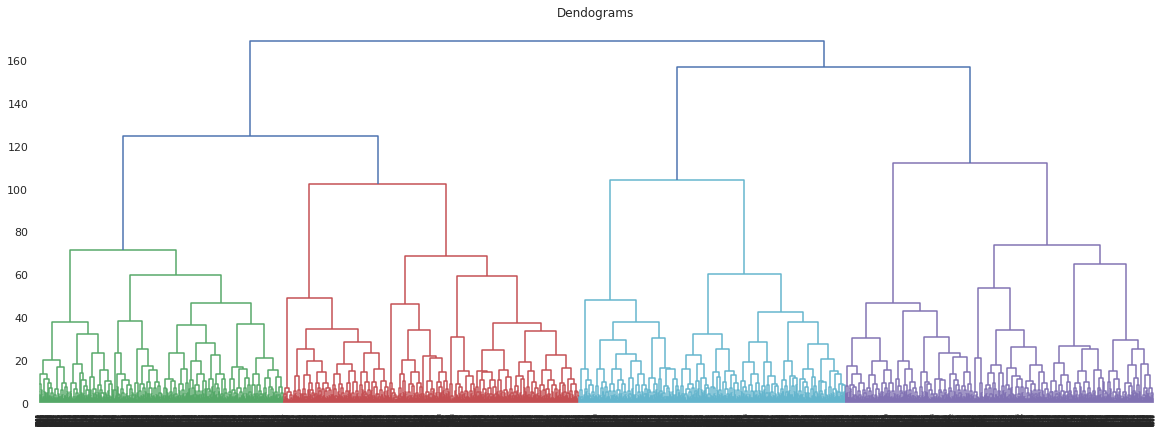

In [ ]:
# linkage Hierarchical Clustering 
from scipy.cluster.hierarchy import dendrogram,linkage

plt.figure(figsize=(20, 7))
plt.title("Dendograms")
l=linkage(y=kernal_pca_X_embedded2 , method='complete',metric='euclidean')
den = dendrogram(l)
plt.show()

from Dendograms Hierarchical Clustering  good clusters number is  3

**2-Kmeans**

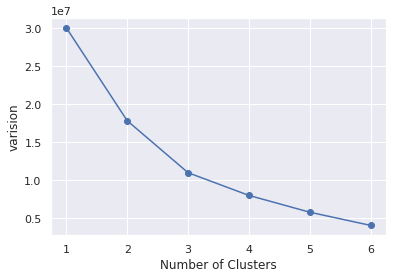

In [ ]:
from sklearn.cluster import KMeans
iter_l=[]
for i in range(1, 7):
    kmean2 = KMeans(n_clusters=i,random_state=42)
    kmean2.fit(kernal_pca_X_embedded2)
    iter_l.append(kmean2.inertia_)
    
plt.plot(range(1, 7), iter_l, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('varision')
plt.show()

from elbow curve for Kmeans good clusters number is 2

In [ ]:
#silhouette_score
from sklearn.metrics import silhouette_score
kmean_obj = KMeans(n_clusters=2, random_state=42).fit(kernal_pca_X_embedded2)
kpca_Tsne_kmean_withLabels=kernal_pca_X_embedded2.copy()
kpca_Tsne_kmean_withLabels['KMeans_labels'] = kmean_obj.labels_
print("silhouette score KMeans",silhouette_score(kpca_Tsne_kmean_withLabels, kpca_Tsne_kmean_withLabels['KMeans_labels'] ))

silhouette score KMeans 0.38169000715988527


[Text(0.5, 1.0, 'KMeans Clusters')]

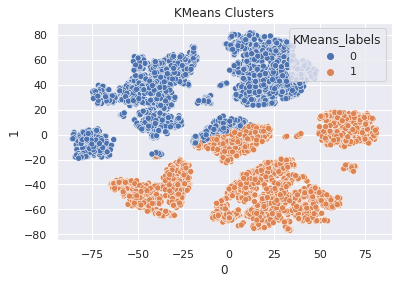

In [ ]:
sns.scatterplot(data=kpca_Tsne_kmean_withLabels, x=0, y=1,hue=kpca_Tsne_kmean_withLabels['KMeans_labels']).set(title='KMeans Clusters')

In [ ]:
kpca_Tsne_kmean_withLabels.to_csv("/content/drive/MyDrive/ML2/CC_GENERAL_Kmeans.csv")

**3-DBSCAN**

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
DBscan_obj = DBSCAN(eps = 2, min_samples = 13).fit(kernal_pca_X_embedded2)
kpca_Tsne_DBscan_withLabels = kernal_pca_X_embedded2.copy()
kpca_Tsne_DBscan_withLabels['label'] = DBscan_obj.labels_


In [ ]:
KNN_obj = NearestNeighbors(n_neighbors=14, radius=2.0)
KNN_obj.fit(kernal_pca_X_embedded2)
distances, neighbors = KNN_obj.kneighbors(kernal_pca_X_embedded2)

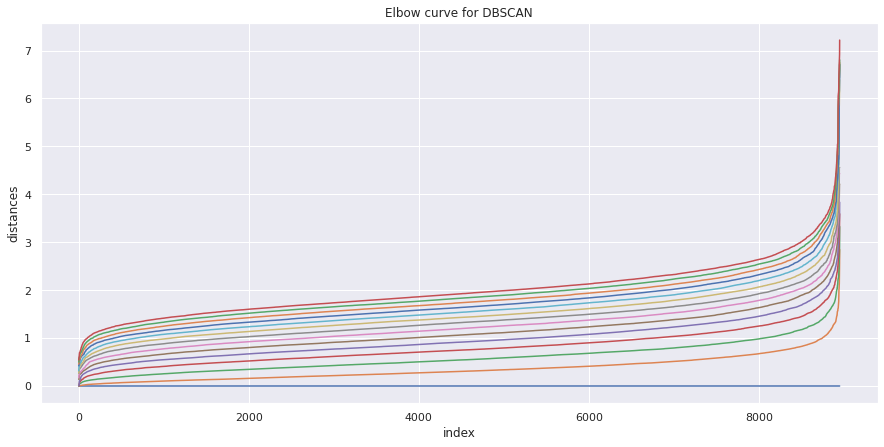

In [ ]:
# sort distances
distances = np.sort(distances[:, ], axis = 0)
plt.figure(figsize=(15,7))
plt.title("Elbow curve for DBSCAN")
plt.plot(distances)
plt.xlabel('index')
plt.ylabel('distances')
plt.grid(True)

plt.show()

In [ ]:
print("silhouette score DBSCAN",silhouette_score(kernal_pca_X_embedded2, kpca_Tsne_DBscan_withLabels['label'] ))

silhouette score DBSCAN 0.1432655


[Text(0.5, 1.0, 'DBscan Clusters')]

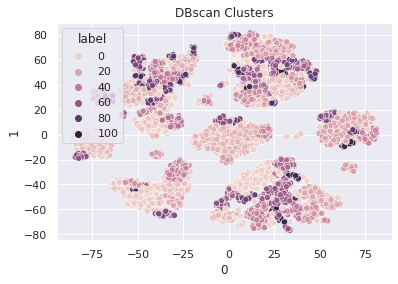

In [ ]:
sns.scatterplot(data=kpca_Tsne_DBscan_withLabels, x=0, y=1,hue=kpca_Tsne_DBscan_withLabels['label']).set(title='DBscan Clusters')

In [ ]:
kpca_Tsne_DBscan_withLabels.to_csv("/content/drive/MyDrive/ML2/CC_GENERAL_DBscan.csv")

**4-Agglomerative Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg_obj = AgglomerativeClustering(n_clusters=6,linkage='complete').fit(kernal_pca_X_embedded2)
kpca_Tsne_agg_withLabels = kernal_pca_X_embedded2.copy()
kpca_Tsne_agg_withLabels['label'] = agg_obj.labels_

In [ ]:
print("silhouette score Agglomerative Clustering",silhouette_score(kernal_pca_X_embedded2, kpca_Tsne_agg_withLabels['label']))

silhouette score Agglomerative Clustering 0.39535564


[Text(0.5, 1.0, 'Agglomerative Clusters')]

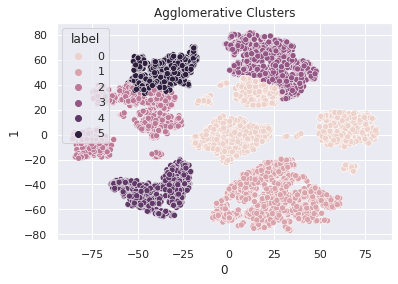

In [ ]:
sns.scatterplot(data=kpca_Tsne_agg_withLabels, x=0, y=1,hue=kpca_Tsne_agg_withLabels['label']).set(title='Agglomerative Clusters')

In [ ]:
kpca_Tsne_agg_withLabels.to_csv("/content/drive/MyDrive/ML2/CC_GENERAL_Agglomerative Clustering.csv")

**5-EM**

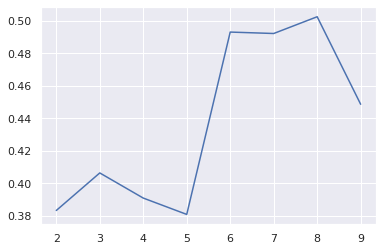

In [ ]:
from sklearn.mixture import GaussianMixture
clusters_li_n = list(range(2,10))
silhoutte_score = []
best_cluster_model = None 

for n_clusters in clusters_li_n:
    gmm_obj = GaussianMixture(n_components=n_clusters)
    gmm_label = gmm_obj.fit_predict(kernal_pca_X_embedded2)
  
    silhouette_num = silhouette_score(kernal_pca_X_embedded2, gmm_label)
    silhoutte_score.append(silhouette_num)

    # selecting the   best clustering model
    if silhouette_num >= np.max(silhoutte_score):
        best_cluster_model = gmm_obj

plt.plot(clusters_li_n, silhoutte_score)

In [ ]:
gm_obj = GaussianMixture(n_components=2)
kpca_Tsne_EM_withLabels =kernal_pca_X_embedded2.copy()
kpca_Tsne_EM_withLabels['label'] = gm_obj.fit_predict(kernal_pca_X_embedded2)


In [ ]:
#number of data  in each cluster
kpca_Tsne_EM_withLabels['label'].value_counts()

0    6297
1    2652
Name: label, dtype: int64

In [ ]:
print("silhouette score EM",silhouette_score(kernal_pca_X_embedded2, kpca_Tsne_EM_withLabels['label']))

silhouette score EM 0.33481142


[Text(0.5, 1.0, 'EM Clusters')]

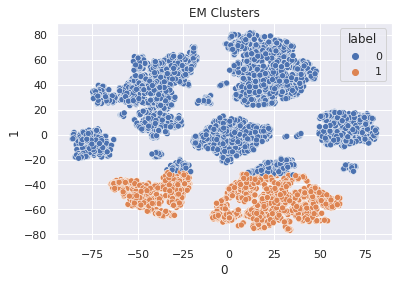

In [ ]:
sns.scatterplot(data=kpca_Tsne_EM_withLabels, x=0, y=1,hue=kpca_Tsne_EM_withLabels['label']).set(title='EM Clusters')

**8-Anomaly detection**

1.EM 

2-DBscan

3-Isolated Random Forest

In [ ]:
df_copy_with_outliers.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df_copy_with_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CRED

In [ ]:
df_copy_with_outliers.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,845.003358,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.905284,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.452292,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
from sklearn import preprocessing
transformer = preprocessing.Normalizer().fit(df_copy_with_outliers)
df_copy_with_outliers=transformer.transform(df_copy_with_outliers)
df_copy_with_outliers

array([[3.93529208e-02, 7.87219116e-04, 9.17897286e-02, ...,
        1.34230246e-01, 0.00000000e+00, 1.15458778e-02],
       [2.93875725e-01, 8.34231054e-05, 0.00000000e+00, ...,
        9.84037362e-02, 2.03922922e-05, 1.10118488e-03],
       [3.10797802e-01, 1.24560826e-04, 9.63066935e-02, ...,
        7.81351110e-02, 0.00000000e+00, 1.49472991e-03],
       ...,
       [2.27729209e-02, 8.11047126e-04, 1.40538302e-01, ...,
        8.02142497e-02, 2.43314235e-04, 5.83954164e-03],
       [2.65239400e-02, 1.64244246e-03, 0.00000000e+00, ...,
        1.09890537e-01, 4.92732934e-04, 1.18255904e-02],
       [1.86405379e-01, 3.33425336e-04, 5.46775599e-01, ...,
        4.41566401e-02, 0.00000000e+00, 3.00082652e-03]])

In [ ]:
df_with_outliers_embedded = TSNE(learning_rate='auto',random_state=42).fit_transform(df_copy_with_outliers)


In [ ]:
df_with_outliers_embedded = pd.DataFrame(df_with_outliers_embedded, index=df.index)

[Text(0.5, 1.0, 'data with outliers')]

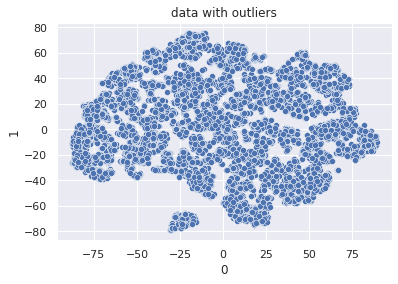

In [ ]:
sns.scatterplot(data=df_with_outliers_embedded, x=0, y=1).set(title='data with outliers')

In [ ]:
df_with_outliers_embedded

,0,1
CUST_ID,,
C10001,-59.874615,18.221443
C10002,67.626144,19.996944
C10003,-21.148190,-24.927568
C10004,-25.058485,-19.814425
C10005,14.779330,-44.446060
...,...,...
C19186,-54.036453,49.320049
C19187,-48.927258,42.719746
C19188,-70.429169,12.193993


**1- using EM **

In [ ]:
EM_obj = GaussianMixture().fit(df_copy_with_outliers)
# find probabilities for each sample
scores = EM_obj.score_samples(df_copy_with_outliers)

# select threshold for 3%
thresh = np.quantile(scores, .03)
print(thresh)

scores= pd.DataFrame(scores,index=df.index)

df_with_outliers_embedded['label_EM']=1
index = np.where(scores <= thresh)
df_with_outliers_embedded.loc[df.index[index[0]],'label_EM'] = -1

df_with_outliers_embedded['label_EM'].value_counts()

46.850209682343696


 1    8680
-1     269
Name: label_EM, dtype: int64

In [ ]:
sns.scatterplot(data=df_with_outliers_embedded, x=0, y=1).set(title='data with outliers')

[Text(0.5, 1.0, 'Anomaly using EM')]

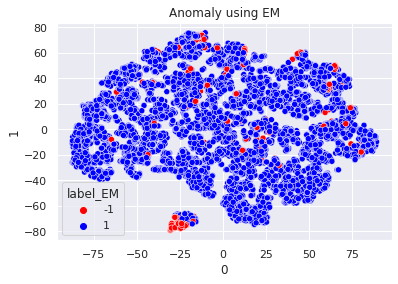

In [ ]:
sns.scatterplot(x=df_with_outliers_embedded[0], y=df_with_outliers_embedded[1],hue=df_with_outliers_embedded['label_EM'],palette=["red",'blue']).set(title='Anomaly using EM')

**2- Using Dbscan**

In [ ]:
DBscan_obj = DBSCAN(eps = 0.3, min_samples = 13).fit(df_copy_with_outliers)

df_with_outliers_embedded['label_DBscan'] = DBscan_obj.labels_

KNN_obj = NearestNeighbors(n_neighbors=14, radius=0.3)
KNN_obj.fit(df_copy_with_outliers)
distances, neighbors = KNN_obj.kneighbors(df_copy_with_outliers)
df_with_outliers_embedded['label_DBscan'].value_counts()

 0    8945
-1       4
Name: label_DBscan, dtype: int64

[Text(0.5, 1.0, 'Anomaly using DBscan')]

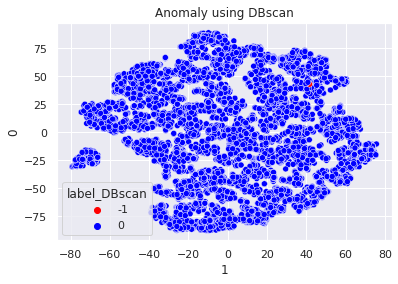

In [ ]:
sns.scatterplot(x=df_with_outliers_embedded[1], y=df_with_outliers_embedded[0],hue=df_with_outliers_embedded['label_DBscan'],palette=["red",'blue']).set(title='Anomaly using DBscan')

**3- usig Isolation Random Forest**

In [ ]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0,contamination=0.1,n_estimators=50).fit(df_copy_with_outliers)
df_with_outliers_embedded["label_forest"]=clf.predict(df_copy_with_outliers)

In [ ]:
df_with_outliers_embedded["label_forest"].value_counts()

 1    8054
-1     895
Name: label_forest, dtype: int64

[Text(0.5, 1.0, 'Anomaly usig Isolation Random Forest')]

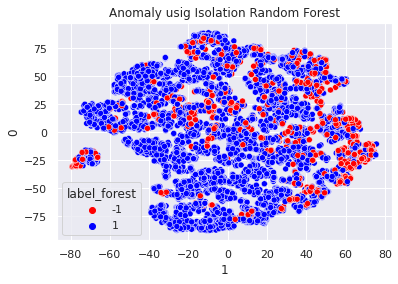

In [ ]:
sns.scatterplot(x=df_with_outliers_embedded[1], y=df_with_outliers_embedded[0],hue=df_with_outliers_embedded["label_forest"],palette=["red",'blue']).set(title='Anomaly usig Isolation Random Forest')

In [ ]:
#saving data 

In [ ]:
df_with_outliers_embedded.to_csv("/content/drive/MyDrive/ML2/CC_GENERAL_Anomaly detection.csv")

**finally finished**